# Исследование зависимости плотности от параметров НСВ в Python

Импорт необходимых библиотек:

In [47]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets

Вспомогательная функция для отрисовки плотности распределения:

In [3]:
"""
pdf – плотность,
xmin, xmax – границы графика по оси х,
grid_size – размер сетки, по которой рисуется график, 
distr_name – название распределения,
**kwargs – параметры плотности
"""
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

## Равномерное непрерывное распределение

### Исследование зависимости плотности от параметров равномерного распределения

In [4]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.uniform.pdf),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=1,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$grid\_size$'),
    distr_name=r'$U$({loc:.2f}, {loc:.2f} + {scale:.2f})',
    loc=widgets.FloatSlider(min=1, max=15, step=0.01, value=3,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.5, max=10, step=0.01, value=1,
                                description='$b - a=$'),
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))

ip.update()

### Сравнение плотности равномерного непрерывного распределения и гистограммы. Проверка формул расчёта математического ожидания и дисперсии для сгенерированных данных

In [5]:
"""
a, b – начало и конец отрезка,
n_points – число наблюдений в выборке
"""
def plot_uniform(a=0, b=1, n_points=1000):
    plt.figure(figsize=(6, 3))
    sample = sts.uniform.rvs(loc=a, scale=b - a, size=n_points) 
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - (b - a) / 6, b + (b - a) / 6, n_points)  
    plt.plot(grid, sts.uniform.pdf(grid, a, b - a), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{R}$(a, b)', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()
    
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round((a + b) / 2, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round((b - a) ** 2 / 12, 3)}')

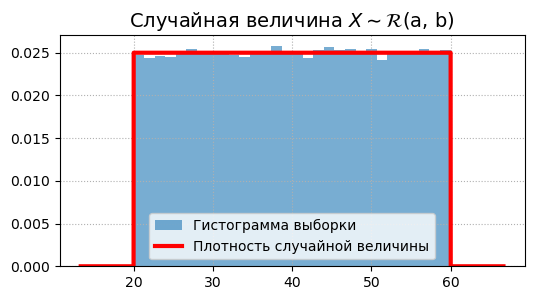

Математическое ожидание: 40.063, а по формуле: 40.0
Дисперсия: 132.905, а по формуле: 133.333


In [6]:
plot_uniform(20, 60, 100_000)

## Экспоненциальное распределение

### Исследование зависимости плотности от параметров экспоненциального распределения

In [7]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.expon.pdf),
    xmin=widgets.FloatSlider(min=0, max=20, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=1, max=20, step=0.1, value=10,
                                description='$x_{max}=$'),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$grid\_size$'),
    distr_name=r'$Exp$({scale:.2f})',
    scale=widgets.FloatSlider(min=0, max=5, step=0.1, value=1,
                                description='$1 / \lambda=$'),
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))

ip.update()

### Сравнение плотности экспоненциального распределения и гистограммы. Проверка формул расчёта математического ожидания и дисперсии для сгенерированных данных

In [8]:
"""
lambda – параметр, характеризующий среднее возрастание интенсивности процесса
за единицу времени
"""
def plot_exp(lmbd=1, n_points=100_000):
    plt.figure(figsize=(6, 3))
    sample = sts.expon.rvs(scale=1 / lmbd, size=n_points) 
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(0, 10, n_points)  
    plt.plot(grid, sts.expon.pdf(grid, scale=1 / lmbd), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim \mathcal{Exp}$($\lambda$)',
              fontsize=14)
    plt.legend(fontsize=10, loc=0)
    plt.grid(ls=':')
    plt.show()
    
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(1 / lmbd, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(1 / lmbd ** 2, 3)}')

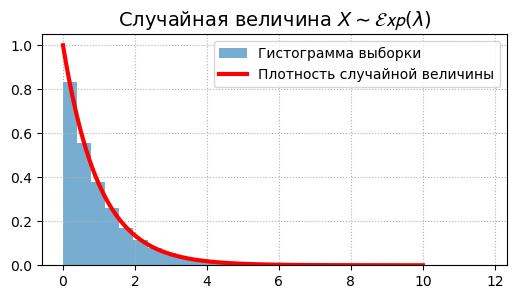

Математическое ожидание: 0.998, а по формуле: 1.0
Дисперсия: 0.994, а по формуле: 1.0


In [9]:
plot_exp()

## Нормальное распределение

### Исследование зависимости плотности от параметров нормального распределения

In [10]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.norm.pdf),
    xmin=widgets.FloatSlider(min=-1, max=10, step=0.1, value=0,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=20, step=0.1, value=15,
                                description='$x_{max}=$'),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$grid\_size$'),
    distr_name=r'$N$({loc:.2f}, {scale:.2f})',
    loc=widgets.FloatSlider(min=-1, max=25, step=0.1, value=10,
                                description='$a=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1,
                                description='$\sigma=$'),
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))

ip.update()

### Сравнение плотности нормального распределения и гистограммы. Проверка формул расчёта математического ожидания и дисперсии для сгенерированных данных

In [11]:
"""
a – параметр, характеризующий среднее значение,
sigma – параметр, характеризующий разброс параметров,
n_points – число наблюдений в выборке
"""
def plot_norm(a=0, sigma=1, n_points=100_000_000):
    plt.figure(figsize=(6, 3))
    sample = sts.norm.rvs(loc=a, scale=sigma, size=n_points) 
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(a - 3 * sigma, a + 3 * sigma, n_points)  
    plt.plot(grid, sts.norm.pdf(grid, a, sigma), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Нормальная величина $X \sim \mathcal{N}$', fontsize=14)
    plt.legend(fontsize=8, loc=8)
    plt.grid(ls=':')
    plt.show()
    
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(a, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(sigma ** 2, 3)}')

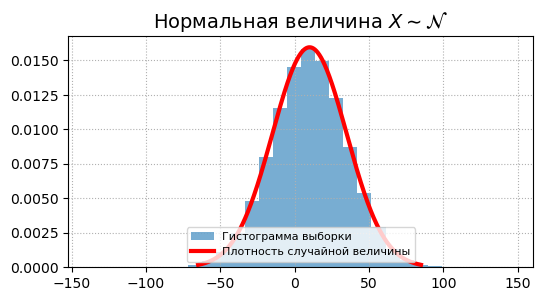

Математическое ожидание: 9.999, а по формуле: 10
Дисперсия: 624.959, а по формуле: 625


In [12]:
plot_norm(10, 25)

## Распределение Эрланга

<div style="border: 1px solid; padding: 15px; border-radius: 8px; background-color: #f9f9f9;">
<b>Распределение Эрланга</b> – это непрерывное распределение вероятностей, широко применяемое в теории массового обслуживания и надёжности систем. Оно описывает время, необходимое для наступления k независимых событий, происходящих с постоянной средней интенсивностью (например, время до k-го звонка в колл-центр или до k-го отказа компонента).
</div>

<b> Формула плотности распределения Эрланга: </b>

$$
\varphi(x, \alpha, \beta) = \frac{\beta^{\alpha}\cdot x^{\alpha-1}\cdot e^{-\beta x}}{(\alpha-1)!}, \quad x \ge 0,
$$

где:
* $ \alpha \in \mathbb{N} $ – число этапов или событий;
* $ \beta > 0 $ – интенсивность (среднее число событий в единицу времени).

<b> Параметры распределения Эрланга scipy.stats.erlang в scipy.stats. </b>

* a = $ \alpha $. При увеличении $ \alpha $ график становится более симметричным и колоколообразным, распределение всё больше напоминает нормальное.
* loc (по умолчанию loc = 0) – сдвиг. В классическом случае loc = 0, так как время не может быть отрицательным.
* scale = $\frac{1}{\beta}$ (по умолчанию scale = 1) – масштабный параметр, обратно пропорциональный интенсивности $ \beta $. При увеличении этого параметра кривая растягивается вправо, пик смещается вправо и становится ниже и шире.

<b> Свойства распределения Эрланга: </b>

* математическое ожидание: $ \mu + \frac{\alpha}{\beta} $, где $ \mu $ – сдвиг по оси ОХ;
* дисперсия: $ \frac{\alpha}{\beta^2}. $

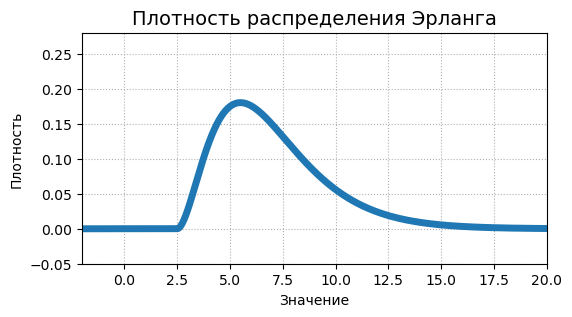

In [23]:
show_pdf(pdf=sts.erlang.pdf, xmin=-2, xmax=20, grid_size=10_000,
        distr_name='распределения Эрланга', a=3, loc=2.5, scale=1.5)

### Исследование зависимости плотности от параметров распределения Эрланга

In [32]:
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.erlang.pdf),
    xmin=widgets.FloatSlider(min=-5, max=20, step=0.1, value=-2,
                                description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=5, max=20, step=0.1, value=15,
                                description='$x_{max}=$'),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100,
                                description='$grid\_size$'),
    distr_name='распределения Эрланга',
    a=widgets.IntSlider(min=1, max=25, step=1, value=3,
                                description=r'$\alpha=$'),
    loc=widgets.FloatSlider(min=0, max=25, step=0.1, value=0,
                                description='$loc=$'),
    scale=widgets.FloatSlider(min=0.01, max=10, step=0.01, value=1,
                                description=r'$\frac{1}{\beta}=$'),
)

display(widgets.VBox(ip.children[:3] + ip.children[4:]))

ip.update()

### Сравнение плотности распределения Эрланга и гистограммы. Проверка формул расчёта математического ожидания и дисперсии для сгенерированных данных

In [45]:
"""
alpha – параметр, характеризующий число этапов или событий,
mu – параметр, характеризующий сдвиг,
beta – интенсивность (среднее число событий в единицу времени),
n_points – число наблюдений в выборке
"""
def plot_erlang(alpha=1, mu=0, beta=1, n_points=10_000_000):
    plt.figure(figsize=(6, 3))
    sample = sts.erlang.rvs(a=alpha, loc=mu, scale=1 / beta, size=n_points) 
    plt.hist(sample, bins=30, density=True, alpha=0.6,
             label='Гистограмма выборки')
    grid = np.linspace(mu - 5, mu + 20, n_points)  
    plt.plot(grid, sts.erlang.pdf(grid, a=alpha, loc=mu, scale=1 / beta), color='red', lw=3,
             label='Плотность случайной величины')
    plt.title(r'Случайная величина $X \sim Erlang$', fontsize=14)
    plt.legend(fontsize=8, loc=0)
    plt.grid(ls=':')
    plt.show()
    
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, '
          f'а по формуле: {round(mu + alpha / beta, 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, '
          f'а по формуле: {round(alpha / (beta ** 2), 3)}')

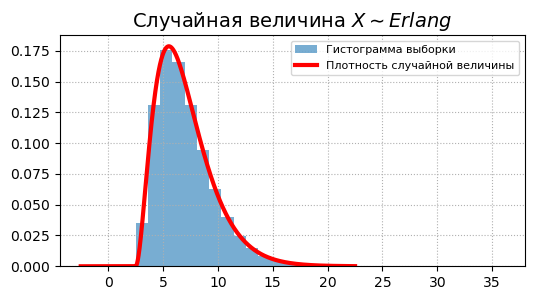

Математическое ожидание: 7.043, а по формуле: 7.045
Дисперсия: 6.876, а по формуле: 6.887


In [46]:
plot_erlang(3, 2.5, 0.66)